In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import imdb

# 파일불러오기
# 웹스크래핑 불러오기
(train_data,train_label),(test_data,test_label) = imdb.load_data(num_words=500)
# (25000,)
print(train_data.shape,test_data.shape)

(25000,) (25000,)


In [2]:
# 데이터 전처리
sub_data,val_data,sub_label,val_label = train_test_split(train_data,train_label,random_state=42)


# 
print(sub_data.shape,val_data.shape)

(18750,) (6250,)


In [3]:
lengths = np.array([len(x) for x in train_data])

print(np.mean(lengths),np.median(lengths))
print(np.max(lengths))
print(np.min(lengths))

238.71364 178.0
2494
11


In [ ]:
# 그래프그리기
plt.hist(lengths)
plt.xlabel('lengths')
plt.ylabel('frequency')
plt.show()

In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(sub_data,maxlen=100)
# 문장길이 218
print(train_seq[0])
print(len(sub_data[0]))
print(len(train_seq[0]))
print(train_seq[5])

[  2  13 124   4   2  81   2   2 188   4   2   2  18 118   2  18  14  20
 190  13 122  24 169 101   2  11  41 116  12 186  15   8  79   2  25  43
  28   8   2  66   2  11   2   5   2 139   5   2  32  11  32   6  87  20
  48  25  92  40  12 475   2 106  12 174   5  67  48  25  79  12  48  12
   2  25   2  42   2  42   2   2  95 104  48  15  16  24  51   4 167  16
 165   2  33 143  14  20  11   4  86 273]
568
100
[312 489  10  10   2  47  69   2  11   2  11   2 153  19   2 245   5   2
  31   7  27 171 108  13 161 459  18  21   8  72   2   9 131  27   2   2
 259   2  19  27 303 157  80 220 434 358  14   2 157   5 174  14  22   9
   6   2  33   4 350   7  27   2   2  23 175   2 474   2 194 278   8  30
   2   8  67  14  23   6   2 268 137  15  80 242 115   2  45  52   8 124
  15  33 222  14 356  47  77   2  23 288]


In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(sub_data,maxlen=100)
# 문장길이 218
print(train_seq[0])
print(len(sub_data[0]))
print(len(train_seq[0]))
print(train_seq[5])

[  2  13 124   4   2  81   2   2 188   4   2   2  18 118   2  18  14  20
 190  13 122  24 169 101   2  11  41 116  12 186  15   8  79   2  25  43
  28   8   2  66   2  11   2   5   2 139   5   2  32  11  32   6  87  20
  48  25  92  40  12 475   2 106  12 174   5  67  48  25  79  12  48  12
   2  25   2  42   2  42   2   2  95 104  48  15  16  24  51   4 167  16
 165   2  33 143  14  20  11   4  86 273]
568
100
[312 489  10  10   2  47  69   2  11   2  11   2 153  19   2 245   5   2
  31   7  27 171 108  13 161 459  18  21   8  72   2   9 131  27   2   2
 259   2  19  27 303 157  80 220 434 358  14   2 157   5 174  14  22   9
   6   2  33   4 350   7  27   2   2  23 175   2 474   2 194 278   8  30
   2   8  67  14  23   6   2 268 137  15  80 242 115   2  45  52   8 124
  15  33 222  14 356  47  77   2  23 288]


In [ ]:
print(train_seq[1])


In [ ]:
# train_oh = keras.utils.to_categorical(train_seq)
# print(train_seq[0])
# print(train_oh[0])

In [6]:
test_seq = pad_sequences(val_data,maxlen=100)
# test_oh = keras.utils.to_categorical(test_seq)
# print(test_oh[0])

In [7]:
# 순환 신경망 선언
model = keras.Sequential()
# 순환 신경망
model.add(keras.layers.Embedding(500,16,input_length=100))
# GRU

# model.add(keras.layers.GRU(8,dropout=0.3))

# LSTM
model.add(keras.layers.LSTM(8,dropout=0.3),return_sequences=True)
model.add(keras.layers.LSTM(8,dropout=0.3))
# model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
model.add(keras.layers.Dense(1,activation='sigmoid'))

model.summary()


2022-07-19 10:39:07.904660: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-19 10:39:07.905364: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 순환 신경망 설정 adam
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
# 콜백 - 20번돌고, 가장 낮은 손실률을 저장
import tensorflow as tf
check_cb = keras.callbacks.ModelCheckpoint('best-rnn.h5',save_best_only=True)
early_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
with tf.device("/device:CPU:0"):
    history = model.fit(train_seq,sub_label,epochs=10,batch_size=64,\
        validation_data=(test_seq,val_label),callbacks=[check_cb,early_cb])
# history = model.fit(train_oh,sub_label,epochs=100,batch_size=64,\
#     validation_data=(test_oh,val_label),callbacks=[check_cb,early_cb])

Epoch 1/10


2022-07-19 10:42:47.504222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


292/293 [============================>.] - ETA: 0s - loss: 0.4570 - accuracy: 0.7994

2022-07-19 10:42:55.404700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


293/293 [==============================] - 8s 28ms/step - loss: 0.4569 - accuracy: 0.7995 - val_loss: 0.4673 - val_accuracy: 0.7875
Epoch 2/10
293/293 [==============================] - 8s 27ms/step - loss: 0.4500 - accuracy: 0.8018 - val_loss: 0.4624 - val_accuracy: 0.7888
Epoch 3/10
293/293 [==============================] - 8s 27ms/step - loss: 0.4438 - accuracy: 0.8055 - val_loss: 0.4582 - val_accuracy: 0.7915
Epoch 4/10
293/293 [==============================] - 8s 27ms/step - loss: 0.4397 - accuracy: 0.8058 - val_loss: 0.4583 - val_accuracy: 0.7848
Epoch 5/10
293/293 [==============================] - 8s 26ms/step - loss: 0.4356 - accuracy: 0.8067 - val_loss: 0.4553 - val_accuracy: 0.7894
Epoch 6/10
293/293 [==============================] - 8s 26ms/step - loss: 0.4325 - accuracy: 0.8101 - val_loss: 0.4498 - val_accuracy: 0.7930
Epoch 7/10
293/293 [==============================] - 8s 26ms/step - loss: 0.4296 - accuracy: 0.8108 - val_loss: 0.4473 - val_accuracy: 0.7931
Epoch 8/10

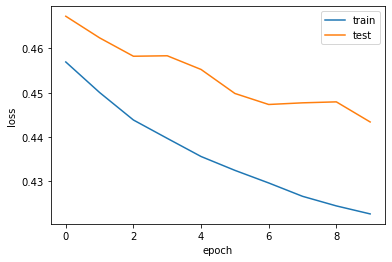

In [12]:
# 그래프 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()


In [11]:
# 정확도
score = model.evaluate(test_seq,val_label)
print("loss, accuracy : ",score)


196/196 [==============================] - 3s 16ms/step - loss: 0.4434 - accuracy: 0.7922
loss, accuracy :  [0.44339582324028015, 0.7921600341796875]
